# Load libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)

2.8.2


[Keras official API documentation](https://keras.io/api/)

# Superconductors dataset: regression

Superconductors are a one type materials which can conduct electricity without losses. However, in order to achive this, they need to be refrigerated below a certain critical temperature which is different for each superconductor material. 

The main goal of this dataset is to predict the critical temperature of each material which is in the last column.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/dataset.csv")

print(data.shape)


(21263, 82)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [6]:
data.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


## Data exploration

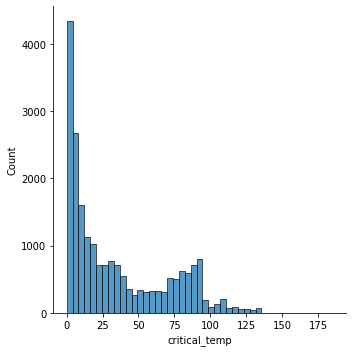

In [7]:
sns.displot(x = 'critical_temp', data = data)

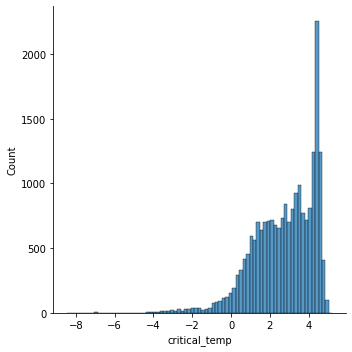

In [8]:
sns.displot(x = np.log(data['critical_temp']))

In this case, the logarithmic transformation didn't make a good job.

## Train test split

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['number_of_elements','critical_temp'])
y = data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

print(X_train.shape)
print(X_test.shape)

(14884, 80)
(6379, 80)


## Scaling features

In [10]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer()
trans.fit(X_train)

X_train_trans = trans.transform(X_train)
X_test_trans  = trans.transform(X_test)

X_train = pd.DataFrame(X_train_trans, columns = X_train.columns)
X_test  = pd.DataFrame(X_test_trans,  columns = X_test.columns)

In [11]:
X_train.shape

(14884, 80)

## Building the neural network

In [12]:
# Callbacks are Keras tools to kepp track of the training progress

from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model.

# Here, the "patience" keyword controls how many iterations the network will do without improving the cost function before stopping.
early_stopping = EarlyStopping(patience=5) 

# .Sequential() creates the baseline to build a Feed Forward network.
model = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features. In our dataset we have 80 columns. We will use 9 neurons in the input layer.
# each neuron will have a "RELU" activation function
# .add() adds a new layer to the Neural Network
# Dense() means that the all the neurons in the layer will be connected to all the inputs.
model.add(Dense(units = 9,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model.add(Dense(units = 3,activation='relu'))
# Adding the final layer with one single neuron to predict the critical temperature.
model.add(Dense(units = 1, activation='relu'))

# To setup the Network we need to use .compile()
# Compile the final network
model.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['mae', 'mse','mape'] # Error matrics to report. But only the "loss" will be used for minimization.
              )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 729       
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


In [13]:
1*(3+1)

4

## Setup the model saving

In [14]:
checkpoint_path = '/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Wether or not save only the weitgths of each neuron.
    verbose=1 # To display the progress
)

In [ ]:
14884*0.20

2976.8

In [ ]:
(14884 - 2977)/20

595.35

In [15]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)


Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn1.hdf5
596/596 - 2s - loss: 748.5225 - mae: 18.6612 - mse: 748.5225 - mape: 1102.8647 - val_loss: 393.9196 - val_mae: 14.3937 - val_mse: 393.9196 - val_mape: 1404.0928 - 2s/epoch - 3ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn1.hdf5
596/596 - 1s - loss: 354.3028 - mae: 13.5418 - mse: 354.3028 - mape: 1047.5800 - val_loss: 341.2664 - val_mae: 13.3534 - val_mse: 341.2664 - val_mape: 1324.4531 - 693ms/epoch - 1ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn1.hdf5
596/596 - 1s - loss: 325.4669 - mae: 12.8989 - mse: 325.4669 - mape: 922.5259 - val_loss: 320.4993 - val_mae: 12.7558 - val_mse: 320.4993 - val_mape: 1270.5649 - 673ms/epoch - 1ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022

In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'mape', 'val_loss', 'val_mae', 'val_mse', 'val_mape'])

In [17]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

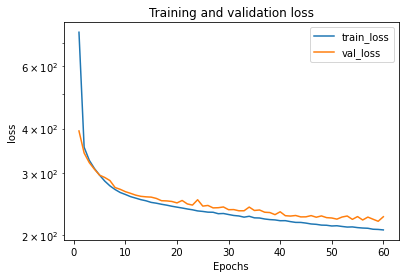

In [18]:
plot_metric(history,'loss')

## Testing the model

In [19]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train.tolist(), 'Predicted': y_pred_train.tolist()})
    df_test  = pd.DataFrame({'Real': y_test.tolist(),  'Predicted': y_pred_test.tolist()})

    return performance, df_train, df_test




In [20]:
y_pred_train_nn1 = model.predict(X_train)
y_pred_test_nn1  = model.predict(X_test)

y_train = np.array(y_train).reshape(-1,1) # (nrows,) ->(nrows,1)
y_test  = np.array(y_test).reshape(-1,1)

results, df1, df2 = model_performance(y_train, y_pred_train_nn1, y_test, y_pred_test_nn1)
results

,Error_metric,Train,Test
0,Mean error,1.98,2.13
1,Mean absolute error,10.17,10.10
2,Mean squared error,215.19,210.37
3,Root mean squared error,14.67,14.50
4,Mean absolute percentual error,948.40,961.73
5,R2,0.82,0.82


In [22]:
pd.DataFrame(y_train).describe()

,0
count,14884.00
mean,34.73
std,34.33
min,0.00
25%,5.50
50%,20.20
75%,63.33
max,185.00


In [ ]:
14/0.00021

66666.66666666666

In [ ]:
y_train.min()

0.00021

## Adding a dropout layer

The number of parameters in a neural network can grow pretty fast with the number of hidden layers and the number of neuron per layer. Therefore neural networks are quite prone to suffer of overfitting. On possible way to minimize this problem is to introduce a **dropout** layer. 

This type of layer does not resemble a regular hidden layer. Instead is a very different type of layer as it does not contain any neuron. What it does is to switch of a random selection of neurons present in the previous layer. The main parameter of a dropout layer is the percentage of neurons to be switched of in the previous layer.

A neural network can have as many dropout layers as needed.

Let's add a dropout layer right after the first hidden layer with a dropout factor of 0.5 (namelly select at random half of the neurons in the previous layer to be switched off).

In [23]:
model2 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model2.add(Dense(units = 9,input_dim = X_train.shape[1],activation='relu'))
# Adding a dropout layer with a 0.5 regularization parameter (it must be between [0,1) )
model2.add(Dropout(0.5))
# Adding a new hidden layer with three neurons with "RELU" activation function
model2.add(Dense(units = 3,activation='relu'))
# Adding the final layer
model2.add(Dense(1, activation='relu'))

# Compile the final network
model2.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['mae', 'mse','mape'] # Error matrics to report
              )


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 729       
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


Now we need to modify our `checkpoint callback` in order to avoid overwriting saved the previous neural network file

In [24]:
checkpoint_path = '/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [25]:
history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=20, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn2.hdf5
596/596 - 1s - loss: 2404.4180 - mae: 34.9332 - mse: 2404.4180 - mape: 100.0000 - val_loss: 2305.1643 - val_mae: 33.8993 - val_mse: 2305.1643 - val_mape: 100.0000 - 1s/epoch - 2ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn2.hdf5
596/596 - 1s - loss: 2404.4180 - mae: 34.9332 - mse: 2404.4180 - mape: 100.0000 - val_loss: 2305.1643 - val_mae: 33.8993 - val_mse: 2305.1643 - val_mape: 100.0000 - 678ms/epoch - 1ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn2.hdf5
596/596 - 1s - loss: 2404.4185 - mae: 34.9332 - mse: 2404.4185 - mape: 100.0000 - val_loss: 2305.1643 - val_mae: 33.8993 - val_mse: 2305.1643 - val_mape: 100.0000 - 642ms/epoch - 1ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/CURR-v3.X-

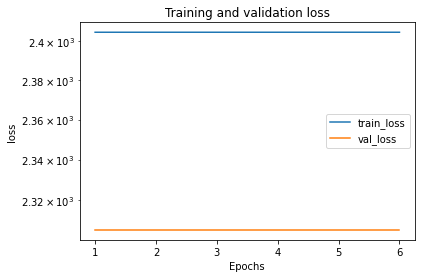

In [26]:
plot_metric(history2,'loss')

In [27]:
y_pred_train_nn2 = model2.predict(X_train)
y_pred_test_nn2  = model2.predict(X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

results2, df12, df22 = model_performance(y_train, y_pred_train_nn2, y_test, y_pred_test_nn2)
results2

,Error_metric,Train,Test
0,Mean error,34.73,33.71
1,Mean absolute error,34.73,33.71
2,Mean squared error,2384.57,2296.44
3,Root mean squared error,48.83,47.92
4,Mean absolute percentual error,100.00,100.00
5,R2,-1.02,-0.98


You can play with different values of the dropout coefficient in order to determine which is the best according to: the architecture of your newral network and the dataset under study, the scaling,...etc.

## Adding regularization L1

As you remember from the lectures, another way to reduce overfitting is to add an additional penalty term to the error metrics in order to force the parameters to be as smallest as possible. 

In particular, there are two possible types of regularization. The first one is the L1 regularization and the L2.

Let's cover first the L1 regularization. This type of regularization adds a penalty term which has the following form:

$$\lambda\sum_{k}\sum_{ij}|\Theta_{ij}^{(k)}|$$

where $\Theta_{ij}^{(k)}$ are the weights of layer (k), and $\lambda$ is the regularization parameter. If $\lambda$ is high, then the penalty term will be high and then the training process will try to set to zero the wheights in order to miminize this term. In this scenario, the neural network will not do almost anything and therefore the network will underfit the problem. In contrast, when the $\lambda$ parameter is small this term will have an small impact and the neural netork will not overfit the data. The optimal value for this regulariozation parameter will depend again on several things:

* network achitecture
* dataset
* scaling

therefore, there is no universal value and some experimentation is needed in order to find the best value for a given problem.

Let's add an L1 regularizer to our newral network.

In [28]:
from tensorflow.keras import regularizers

In [29]:
model3 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model3.add(Dense(units = 9,input_dim = X_train.shape[1],activation='relu'))
# Adding a dropout layer with a 0.5 regularization parameter (it must be between [0,1) )
model3.add(Dropout(0.5))
# Adding a new hidden layer with three neurons with "RELU" activation function
model3.add(Dense(units = 3,activation='relu'))
# Adding the final layer
model3.add(Dense(1, activation='relu',activity_regularizer=regularizers.l1(0.01))) # Here the 0.01 is the value of "lambda"

# Compile the final network
model3.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['mae', 'mse','mape'] # Error matrics to report
              )


model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 729       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_7 (Dense)             (None, 3)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


Now, we need to update the filename.

In [30]:
checkpoint_path = '/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn3.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [31]:
history3 = model3.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=20, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn3.hdf5
596/596 - 2s - loss: 1675.1927 - mae: 27.8650 - mse: 1675.0833 - mape: 410.1465 - val_loss: 551.1433 - val_mae: 16.3085 - val_mse: 550.8869 - val_mape: 1219.1710 - 2s/epoch - 3ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn3.hdf5
596/596 - 1s - loss: 749.1262 - mae: 18.1981 - mse: 748.8463 - mape: 1558.5553 - val_loss: 446.4019 - val_mae: 14.7267 - val_mse: 446.1287 - val_mape: 1135.3539 - 725ms/epoch - 1ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn3.hdf5
596/596 - 1s - loss: 716.6363 - mae: 17.6724 - mse: 716.3500 - mape: 632.1585 - val_loss: 432.9714 - val_mae: 14.4937 - val_mse: 432.7017 - val_mape: 1031.6995 - 741ms/epoch - 1ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/CURR-v3.X-JUL202

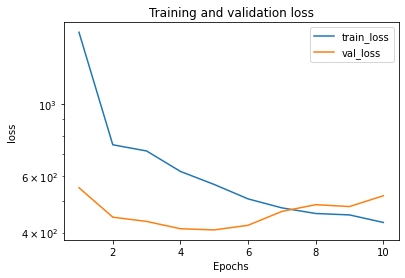

In [32]:
plot_metric(history3,'loss')

In [33]:
y_pred_train_nn3 = model3.predict(X_train)
y_pred_test_nn3  = model3.predict(X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

results3, df13, df23 = model_performance(y_train, y_pred_train_nn3, y_test, y_pred_test_nn3)
results3

,Error_metric,Train,Test
0,Mean error,10.04,9.74
1,Mean absolute error,15.90,15.62
2,Mean squared error,529.11,506.95
3,Root mean squared error,23.00,22.52
4,Mean absolute percentual error,898.34,859.38
5,R2,0.55,0.56


## Replacing regularization L1 by L2

The second type of regularization is the L2. In this case, the additonal penalty term takes the following form:

$$\lambda\sum_{k}\sum_{ij}(\Theta_{ij}^{(k)})^{2}$$

again, the optimal value of $\lambda$ needs to be found by trial and error.

In [34]:
model4 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model4.add(Dense(units = 9,input_dim = X_train.shape[1],activation='relu'))
# Adding a dropout layer with a 0.5 regularization parameter (it must be between [0,1) )
model4.add(Dropout(0.5))
# Adding a new hidden layer with three neurons with "RELU" activation function
model4.add(Dense(units = 3,activation='relu'))
# Adding the final layer
model4.add(Dense(1, activation='relu',activity_regularizer=regularizers.l2(0.01)))

# Compile the final network
model4.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['mae', 'mse','mape'] # Error matrics to report
              )


model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 729       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_10 (Dense)            (None, 3)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


In [35]:
checkpoint_path = '/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn4.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [36]:
history4 = model4.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=20, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn4.hdf5
596/596 - 2s - loss: 1148.4415 - mae: 22.4581 - mse: 1138.4999 - mape: 1281.6414 - val_loss: 485.8420 - val_mae: 15.4323 - val_mse: 473.1897 - val_mape: 1125.3367 - 2s/epoch - 3ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn4.hdf5
596/596 - 1s - loss: 624.8684 - mae: 16.6435 - mse: 607.6567 - mape: 1330.2471 - val_loss: 409.5425 - val_mae: 14.1100 - val_mse: 395.6111 - val_mape: 1230.8229 - 772ms/epoch - 1ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn4.hdf5
596/596 - 1s - loss: 554.0150 - mae: 15.6135 - mse: 536.3484 - mape: 1113.0895 - val_loss: 373.8134 - val_mae: 13.4622 - val_mse: 358.6537 - val_mape: 1272.4915 - 766ms/epoch - 1ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2

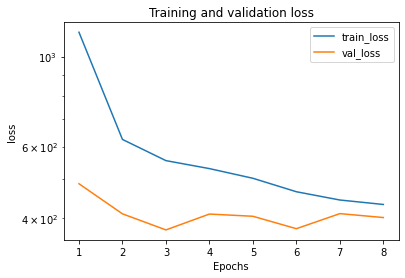

In [37]:
plot_metric(history4,'loss')

In [38]:
y_pred_train_nn4 = model4.predict(X_train)
y_pred_test_nn4  = model4.predict(X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

results4, df14, df24 = model_performance(y_train, y_pred_train_nn4, y_test, y_pred_test_nn4)
results4

,Error_metric,Train,Test
0,Mean error,6.58,6.49
1,Mean absolute error,13.93,13.70
2,Mean squared error,391.58,374.97
3,Root mean squared error,19.79,19.36
4,Mean absolute percentual error,1032.76,984.91
5,R2,0.67,0.68


## Combining all the regularizers

The different approaches used so far are not mutually exclusive, they can be used together. Let's see an example.

In [39]:
model5 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model5.add(Dense(units = 9,input_dim = X_train.shape[1],activation='relu'))
# Adding a dropout layer with a 0.5 regularization parameter (it must be between [0,1) )
model5.add(Dropout(0.5))
# Adding a new hidden layer with three neurons with "RELU" activation function
model5.add(Dense(units = 3,activation='relu'))
# Adding the final layer
model5.add(Dense(1, activation='relu',activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

# Compile the final network
model5.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['mae', 'mse','mape'] # Error matrics to report
              )


model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 9)                 729       
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 dense_13 (Dense)            (None, 3)                 30        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


In [40]:
checkpoint_path = '/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn5.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [41]:
history5 = model5.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=20, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn5.hdf5
596/596 - 2s - loss: 2404.4175 - mae: 34.9332 - mse: 2404.4175 - mape: 100.0000 - val_loss: 2305.1643 - val_mae: 33.8993 - val_mse: 2305.1643 - val_mape: 100.0000 - 2s/epoch - 3ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn5.hdf5
596/596 - 1s - loss: 2404.4170 - mae: 34.9332 - mse: 2404.4170 - mape: 100.0000 - val_loss: 2305.1643 - val_mae: 33.8993 - val_mse: 2305.1643 - val_mape: 100.0000 - 753ms/epoch - 1ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/reg-nn5.hdf5
596/596 - 1s - loss: 2404.4167 - mae: 34.9332 - mse: 2404.4167 - mape: 100.0000 - val_loss: 2305.1643 - val_mae: 33.8993 - val_mse: 2305.1643 - val_mape: 100.0000 - 754ms/epoch - 1ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/CURR-v3.X-

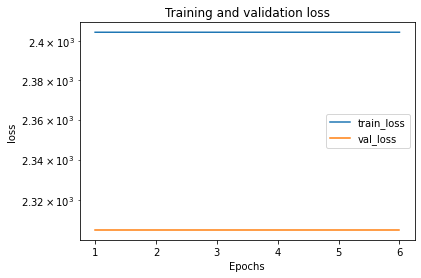

In [42]:
plot_metric(history5,'loss')

In [43]:
y_pred_train_nn5 = model5.predict(X_train)
y_pred_test_nn5  = model5.predict(X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

results5, df15, df24 = model_performance(y_train, y_pred_train_nn5, y_test, y_pred_test_nn5)
results5

,Error_metric,Train,Test
0,Mean error,34.73,33.71
1,Mean absolute error,34.73,33.71
2,Mean squared error,2384.57,2296.44
3,Root mean squared error,48.83,47.92
4,Mean absolute percentual error,100.00,100.00
5,R2,-1.02,-0.98


Now let's create a function to create a general neural network for regression.

In [44]:
my_list = [1,4,5]

for index, value in enumerate(my_list):
    print(index,value)

0 1
1 4
2 5


In [45]:
def create_reg_nn_model(inputs,layer_list= [9,3,1], # The list contains as many elements as layers. Every value in the list is the number of neurons in the layer
                 activations = ['relu','relu','relu'], # Activation functions in each layer.
                 dropouts = [0.5,0,0], # Dropout coefficients in each layer.
                 regularizers = [('l1',0.01),('l2',0.01)]): # List of tuples with regularizer type and lambda.
    '''
    This function creates a neural network with the given amount of layers, neurons,
    activations, dropouts and regularizers.
    Inputs: 
    inputs -> input size. It must be integer
    activations -> a list of activation functions to be used in each layer
    droputs -> a list of dropouts coefficients to be used in each layer except the last one
    regularizers -> a list of regularizers to be used in the last layer. Coefficients should
    be set to zero if no regularizers are wanted.
    Output:
    neural network already compiled with: 'adam' optimizer and 'mse' as the loss.
    '''
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts)) # List of tuples with [(neurons1,activation1,dropout1),(neurons2,activation2,dropout2),..]

    for index, elem in enumerate(my_list): # [(neurons,activation_funtion,drop_our_coef),(),(),....], elem[]
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):
            # Adding a dropout layer with regularization parameter (it must be between [0,1) )
                model.add(Dropout(elem[2]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
            if ( elem[2] != 0 ):
                model.add(Dropout(elem[2]))

        if ( index == len(my_list) ):
            model.add(Dense(units = elem[0], activation=elem[1],
                            activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    # Compile the final network
    model.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['mae', 'mse','mape'] # Error matrics to report
              )

    model.summary()

    return model

In [46]:
my_model = create_reg_nn_model(X_train.shape[1],dropouts = [0.1,0.1,0])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 9)                 729       
                                                                 
 dropout_4 (Dropout)         (None, 9)                 0         
                                                                 
 dense_16 (Dense)            (None, 3)                 30        
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


# Classification

Neural networks can also be used for classification. However, for this applications the things are a bit trickier. We need to discriminate between:

* binary classification
* multi class classification

as both types of problems need different settings. 
In this notebook, we are going to handle multi class classification as is more advanced. 

In case of binary classification, **the output layer must have only one neuron** and the activation function **must** be the **sigmoid** function, ie:

$$f(x)=\frac{1}{1+e^{-x}}$$

In contrast, for multi class classification, two different settings are needed. This first is that the output layer shoud contain as many neurons as the possible values of the categorical dependent variable. Thge second is that the activation function of those neurons shoud be the **softmax** function ie:

$$f(x_{i})=\frac{e^{-x_{i}}}{\sum_{j}e^{-x_{j}}}$$

this apparently strange expression is easier to understand that it may seem. The numerator can be understood as a probability of belonging to a given class, because the range of values is [0,1]. However, in general if we add all those values for every class, they will not add 1 as one would expect from a **normalized** probability. Therefore, in order to have a **normalized probability** we must divide the previous term be the sum off all the **unormalized probabilities** 

In [47]:
from sklearn.datasets import make_classification

In this case we are going to generate a fake multiclass classification dataset to be used for illustrative purposes.

In [48]:
# Setting the weights of each class at random
np.random.seed(seed=17)
w = np.random.random(5)

# Normalizing the probabilities dividing each by the sum of the total probabilities
w = [x/sum(w) for x in w]
w

X, y = make_classification(
    n_samples=50000,
    n_features=100,
    n_informative=70,
    n_redundant=0,
    n_repeated=0,
    n_classes=5,
    n_clusters_per_class=1,
    weights=w, # Here is were we set the probabilities of each class in the dataset.
    class_sep=0.8,
    random_state=0,
)


In [49]:
X = pd.DataFrame(X, columns=['X_' + str(i) for i in range(1,X.shape[1]+1)])
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,0.17,1.06,-0.16,2.25,1.26,0.47,-7.00,3.05,-6.24,10.24,...,-0.31,1.02,1.78,-1.96,-4.27,-4.43,0.58,2.47,-2.24,4.65
1,-4.08,0.07,-0.34,7.83,3.14,-0.91,1.96,-7.97,-0.58,-4.15,...,2.49,0.32,-0.91,0.31,-2.22,-4.19,1.30,-1.29,0.84,4.06
2,-7.61,0.03,2.38,0.21,-3.34,0.02,2.85,-5.53,3.15,-3.21,...,-3.60,0.75,0.87,0.47,-1.69,0.50,-2.78,-8.06,-0.28,1.78
3,-1.55,-0.52,-0.92,0.30,4.63,-5.02,-2.88,-2.51,-0.25,3.97,...,10.82,-0.67,-0.72,0.88,-0.86,13.06,5.94,8.29,0.13,-2.44
4,0.36,0.02,-1.63,-3.47,-3.13,-0.82,-5.99,-2.76,-0.24,3.61,...,-1.24,-0.24,0.76,-0.26,-6.02,-9.35,-0.23,0.22,2.84,-6.49


In [50]:
X.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,...,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,-0.37,0.01,-0.00,0.26,0.09,0.05,0.19,-0.51,-0.30,0.16,...,-0.35,-0.00,0.00,0.01,0.55,-0.08,0.76,-0.00,0.13,0.14
std,5.04,1.00,1.00,4.82,5.14,4.84,4.97,4.78,4.80,5.06,...,4.83,1.00,1.00,0.99,4.84,5.29,4.90,4.81,4.92,4.89
min,-23.26,-4.24,-4.13,-20.54,-21.08,-20.65,-19.16,-19.68,-18.61,-20.69,...,-19.70,-4.34,-3.92,-4.35,-21.24,-23.00,-19.97,-22.35,-19.79,-20.58
25%,-3.78,-0.67,-0.68,-2.99,-3.36,-3.19,-3.14,-3.76,-3.54,-3.28,...,-3.61,-0.68,-0.68,-0.66,-2.69,-3.64,-2.55,-3.24,-3.18,-3.17
50%,-0.42,0.01,-0.00,0.27,0.12,0.07,0.19,-0.51,-0.36,0.10,...,-0.35,-0.00,-0.00,0.01,0.55,-0.07,0.75,-0.04,0.15,0.15
75%,2.98,0.69,0.68,3.51,3.56,3.29,3.51,2.70,2.91,3.55,...,2.86,0.66,0.68,0.68,3.81,3.47,4.07,3.20,3.43,3.44
max,20.12,4.66,4.27,20.13,23.37,19.51,24.55,19.41,19.65,23.74,...,21.83,4.36,4.42,4.02,20.29,22.58,20.36,22.22,20.94,20.00


In [51]:
y = pd.DataFrame(y, columns=['class'])

## Train test split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

print(X_train.shape)
print(X_test.shape)

(40000, 100)
(10000, 100)


Let's see how many observations we have of each class

In [53]:
y_train_df = pd.DataFrame(y_train, columns = ['class'])
y_test_df  = pd.DataFrame(y_test, columns = ['class'])
y_train_df.head()

,class
25164,1
37366,4
24912,4
7345,2
28620,1


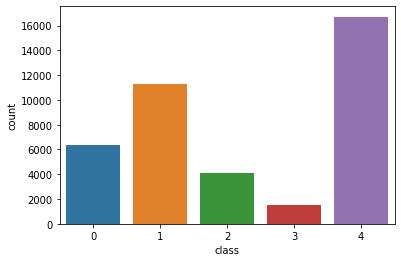

In [54]:
sns.countplot(x = 'class', data = y_train_df );

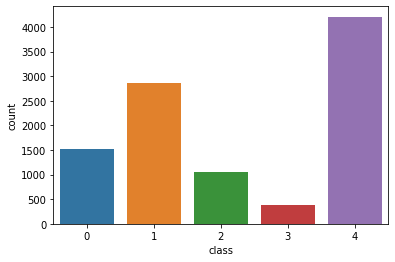

In [55]:
sns.countplot(x = 'class', data = y_test_df );

Clearly, this dataset is not balanced as we have a different amount of observations for each class. This is not a good thing as if we directly train a model with this dataset, the model will better good predicting the class for which we have more samples ( **majority class** ) rather than the class for which we only have a few samples ( **minority class** ). However, we would like to have a model which can be good in predicting any class, not only the dominant class. Therefore we would like to have the same amount of samples of each class which is not allways possible because 

Let's see how we can **mitigate** this problem 

## Balancing the dataset

In [56]:
y_train_df['class'].value_counts()

4    16715
1    11277
0     6363
2     4131
3     1514
Name: class, dtype: int64

## Manual Downsampling

We need to have the same amount of samples in each class as otherwise the model will be better in predicting the majority class. 

With the downsampling approach, we want to have as many samples of each class as samples in the minority class.

We new to know first, which is the minority class and how many samples contains.

Let's see which is the minority class

In [57]:
minority_class = y_train_df['class'].value_counts().index.tolist()[-1]
minority_class

3

In [58]:
sorted(np.unique(y_train).tolist()) == sorted(np.unique(y_test).tolist())

True

In [59]:
np.unique(y_train).tolist()

[0, 1, 2, 3, 4]

On a first sight, downsampling may seem obvious. However if we drop some observations from X_train, we need to know which rows we dropped in order to drop the same rows in the y_train.

Let's create a dictionary in which the keys will be the classes and the values will be the row indexes of the X_train observation with the corresponding  given class. 

The idea is to know for each class which rows contain observations of the corresponding class.

In [60]:
samples = {str(c): list(np.where(y_train == c)[0]) for c in sorted(np.unique(y_train).tolist())}
samples['4'][:5]

[1, 2, 7, 11, 15]

Now let's implement the downsampling according to the set of row indexes

In [61]:
downsamples = {str(c): list(np.random.choice(samples[str(c)], 
               size = len(list(np.where(y_train == minority_class)[0])))) 
               for c in np.unique(y_train)}

downsamples['0'][:5]

[22778, 28931, 38278, 35623, 18341]

In [62]:
X_train.shape

(40000, 100)

Finally get the donwsampled train set.

In [63]:
selection = [downsamples[str(c)] for c in np.unique(y_train).tolist()]
selection = [ x for sublist in selection for x in sublist ]
print(selection[:4])
np.random.shuffle(selection)
print(selection[:4])

[22778, 28931, 38278, 35623]
[28104, 30253, 31894, 1528]


In [64]:
len(selection)

7570

In [65]:
max(selection)

39986

Now our training set will be much smaller than before as we will only have: 

train_samples = n_classes * n_samples_minority_class

which sustantially reduces the training set size.

On the other hand, we are goig to leave the test set untouched. Why? Because we want to evaluate our model in a **realistic scenario** where all the classes will be unbalanced.

In [66]:
X_train_down = X_train.iloc[selection,:]
y_train_down = y_train_df.iloc[selection]

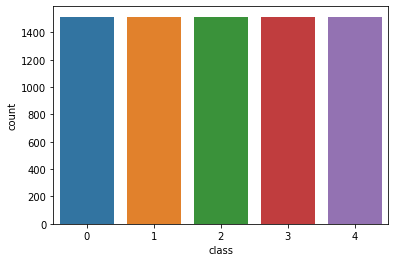

In [67]:
sns.countplot(x = 'class', data = y_train_down )

In [68]:
X_train_down.shape

(7570, 100)

## Scaling features

In [69]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer()
trans.fit(X_train_down)

X_train_down_trans = trans.transform(X_train_down)
X_test_trans       = trans.transform(X_test)

X_train_down_trans = pd.DataFrame(X_train_down_trans, columns = X_train.columns)
X_test_trans       = pd.DataFrame(X_test_trans,  columns = X_test.columns)

## Building the neural network for classification

Now remember that we need to modify the output layer in order to have as many neurons as possible classes. In addition, we also need to change the activation function of the output layer to **softmax**. 

In [70]:
model_c1 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model_c1.add(Dense(units = 32,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model_c1.add(Dense(units = 16,activation='relu'))
# Adding the final layer
model_c1.add(Dense(units = 5, activation='softmax'))

# Compile the final network
model_c1.compile(optimizer='rmsprop', # Optimization method
              loss='categorical_crossentropy', # Error metric to minimize
              metrics=['accuracy'] # Error metrics to report
              )


model_c1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                3232      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3,845
Trainable params: 3,845
Non-trainable params: 0
_________________________________________________________________


Unfortunatelly when dealing with multiclass classification, Keras doesn't like to have an array with the classes of each observation. It needs a dummyfied array. 

In [71]:
y_train_down_a = keras.utils.to_categorical(y_train_down, num_classes=5)

In [72]:
y_train_down[:5]

,class
6008,3
23129,1
11797,2
31096,1
11816,1


In [73]:
y_train_down.shape

(7570, 1)

In [74]:
y_train_down_a 

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

As you can see, Keras expect to have one row for each observation and as many columns as possible classes. Each column will contain 0 or 1 wether or not the sample belongs to the corresponding class. 

In the previous example, the first sample belongs to the second class, the second sample to the second class, the this samples to the thirds class and so on.

In [75]:
y_train_down_a.shape

(7570, 5)

In [76]:
X_train_down_trans.shape

(7570, 100)

We need to replace the name of the file to store the neural network

In [77]:
checkpoint_path = '/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [78]:
history_c1 = model_c1.fit(
    X_train_down_trans, 
    y_train_down_a, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn1.hdf5
606/606 - 1s - loss: 1.3729 - accuracy: 0.4293 - val_loss: 1.1004 - val_accuracy: 0.5746 - 1s/epoch - 2ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn1.hdf5
606/606 - 1s - loss: 0.8279 - accuracy: 0.6982 - val_loss: 0.7722 - val_accuracy: 0.7133 - 664ms/epoch - 1ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn1.hdf5
606/606 - 1s - loss: 0.5534 - accuracy: 0.8149 - val_loss: 0.6305 - val_accuracy: 0.7688 - 645ms/epoch - 1ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn1.hdf5
606/606 - 1s - loss: 0.3999 - accuracy: 0.8714 - val_loss: 0.5383 - val_accuracy: 0.8118 - 622ms/epoch - 1ms/step
Epoch 5/60

Epoch 5: saving model to /content/drive/MyD

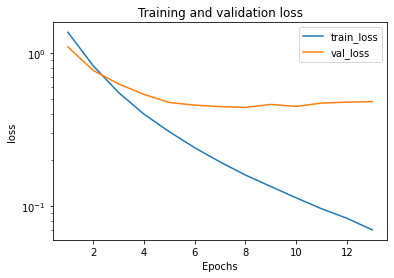

In [79]:
plot_metric(history_c1,'loss')

OMG!!!

As the error metrics used in classification are different, we need to create another function to evaluate the neural network for classification.

In [80]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

    

In [81]:
y_pred_train_c1 = model_c1.predict(X_train_down_trans) # This provides the probability for each class
y_pred_test_c1  = model_c1.predict(X_test_trans) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_train_down, y_pred_train_c1, y_test, y_pred_test_c1)


Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1514
           1       0.97      0.98      0.97      1514
           2       0.97      0.97      0.97      1514
           3       0.97      0.97      0.97      1514
           4       0.97      0.97      0.97      1514

    accuracy                           0.97      7570
   macro avg       0.97      0.97      0.97      7570
weighted avg       0.97      0.97      0.97      7570

Results obtained for the TEST SET
The Cohen's Kappa is: 0.81
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1510
           1       0.91      0.86      0.89      2859
           2       0.70      0.88      0.78      1047
           3       0.46      0.74      0.57       377
           4       0.95      0.88      0.91      4207

    accuracy                           0.86     10000
   macro

In [82]:
model_c1.predict(X_train_down_trans)

array([[2.5694683e-04, 4.7354861e-06, 1.3085657e-02, 9.8544830e-01,
        1.2043874e-03],
       [9.3616009e-12, 9.9998903e-01, 5.6778445e-06, 1.7785939e-06,
        3.5057128e-06],
       [6.5728498e-09, 5.7393945e-06, 9.9998701e-01, 1.1409802e-06,
        6.0706175e-06],
       ...,
       [3.5982653e-06, 7.6228513e-05, 9.9977905e-01, 1.3789807e-04,
        3.2734408e-06],
       [9.5981860e-01, 5.7384127e-04, 3.9319471e-02, 2.8466919e-04,
        3.4787838e-06],
       [1.4781066e-05, 4.5110766e-13, 1.0072224e-08, 6.3154861e-05,
        9.9992204e-01]], dtype=float32)

In [83]:
y_pred_train_c1

array([[3],
       [1],
       [2],
       ...,
       [2],
       [0],
       [4]])

Now let's create a function to create a generic neural network for classification

In [84]:
def create_cla_nn_model(inputs,layer_list= [32,16,5],
                        activations = ['relu','relu','softmax'],
                        dropouts = [0.25,0,0],
                        regularizers = [('l1',0.01),('l2',0.01)]):
    '''
    This function creates a neural network with the given amount of layers, neurons,
    activations, dropouts and regularizers.
    Inputs: 
    inputs -> input size. It must be integer
    activations -> a list of activation functions to be used in each layer
    droputs -> a list of dropouts coefficients to be used in each layer except the last one
    regularizers -> a list of regularizers to be used in the last layer. Coefficients should
    be set to zero if no regularizers are wanted.
    Output:
    neural network already compiled with: 'adam' optimizer and 'mse' as the loss.
    '''
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts)) # [(32,'relu',0.25),(16,'relu',0),(5,'softmax',0)]

    for index, elem in enumerate(my_list):
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):
            # Adding a dropout layer with regularization parameter (it must be between [0,1) )
                model.add(Dropout(elem[2]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ):
            model.add(Dense(elem[0], activation=elem[1],
                            activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    # Compile the final network
    model.compile(optimizer='rmsprop', # Optimization method
              loss='categorical_crossentropy', # Error metric to minimize
              metrics=['accuracy'] # Error metrics to report
              )

    model.summary()

    return model

In [85]:
model_c2 = create_cla_nn_model(X_train.shape[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                3232      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3,845
Trainable params: 3,845
Non-trainable params: 0
_________________________________________________________________


Let's update the name of the file to save the neural network

In [86]:
checkpoint_path = '/content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [87]:
history_c2 = model_c2.fit(
    X_train_down_trans, 
    y_train_down_a, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn2.hdf5
606/606 - 1s - loss: 1.4761 - accuracy: 0.3677 - val_loss: 1.1604 - val_accuracy: 0.5700 - 1s/epoch - 2ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn2.hdf5
606/606 - 1s - loss: 1.0522 - accuracy: 0.5882 - val_loss: 0.8611 - val_accuracy: 0.6816 - 660ms/epoch - 1ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn2.hdf5
606/606 - 1s - loss: 0.8462 - accuracy: 0.6623 - val_loss: 0.7047 - val_accuracy: 0.7470 - 652ms/epoch - 1ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/CURR-v3.X-JUL2022/UNIT8/DAY2/8.03 Neural Networks/cls-nn2.hdf5
606/606 - 1s - loss: 0.7151 - accuracy: 0.7279 - val_loss: 0.6179 - val_accuracy: 0.7814 - 608ms/epoch - 1ms/step
Epoch 5/60

Epoch 5: saving model to /content/drive/MyD

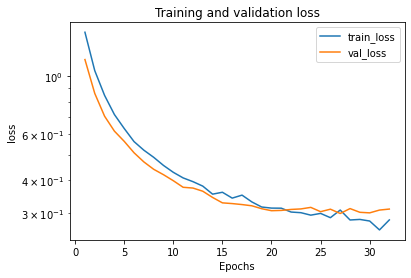

In [88]:
plot_metric(history_c2,'loss')

In [89]:
y_pred_train_c2 = model_c2.predict(X_train_down_trans) # This provides the probability for each class
y_pred_test_c2  = model_c2.predict(X_test_trans) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c2 = np.argmax(y_pred_train_c2, axis=1).reshape(-1,1)
y_pred_test_c2  = np.argmax(y_pred_test_c2, axis=1).reshape(-1,1)

model_performance_class(y_train_down, y_pred_train_c2, y_test, y_pred_test_c2)


Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.96
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1514
           1       0.97      0.98      0.98      1514
           2       0.98      0.96      0.97      1514
           3       0.97      0.96      0.96      1514
           4       0.95      0.99      0.97      1514

    accuracy                           0.97      7570
   macro avg       0.97      0.97      0.97      7570
weighted avg       0.97      0.97      0.97      7570

Results obtained for the TEST SET
The Cohen's Kappa is: 0.88
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1510
           1       0.96      0.93      0.94      2859
           2       0.80      0.90      0.85      1047
           3       0.59      0.85      0.70       377
           4       0.96      0.93      0.95      4207

    accuracy                           0.92     10000
   macro

## Improved class balancing

As you have seen, downsampling is a bit dangerous by several reasons:

* If the minority class only contains a few observations, then with downsampling will reduce the dataset size a lot. Therefore, we will be in the risk of having a model which will not properly learn how to discriminate between classes.

* Downsampling reduces the variability of the dominant classes and then we are in the risk of not covering properly all the possible cases within the majority clases

One strategy to alleviate the last problem of downsampling is to perform first a clustering of the observations corresponding to the majority class and then perform a stratified downsampling.

Another possible strategy is upsampling. Upsampling consists of repeating samples from the minority class in as many times as needed in order to have as many samples as samples in the majority class. However, this doesn't add information to the model. Is just only duplicating information and therefore new observations form the minority class which have different features will not be properly predicted.

A third posibility is to use the SMOTE method, which creates fake samples and uses a K-NN method to predict the corresponding class. If the corresponding class belongs to the dominant class, the fake sample is discarded, otherwise is kept. 

However, this approach is dangerous as it can generate no sense fake data.

Finally all the approaches can be use together, ie: use a bit of downsampling and a bit of upsampling alongside with SMOTE. 
